前几行数据：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  

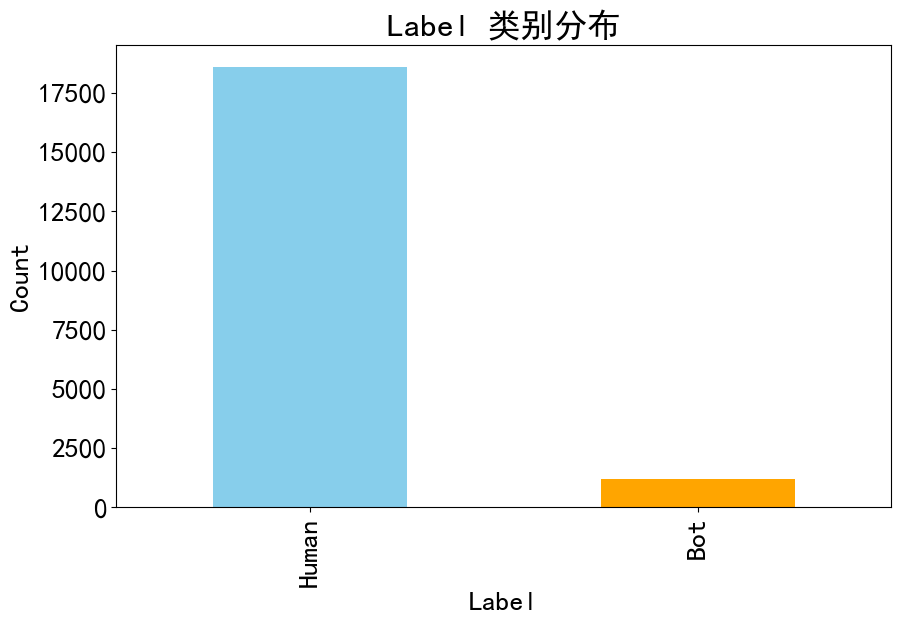

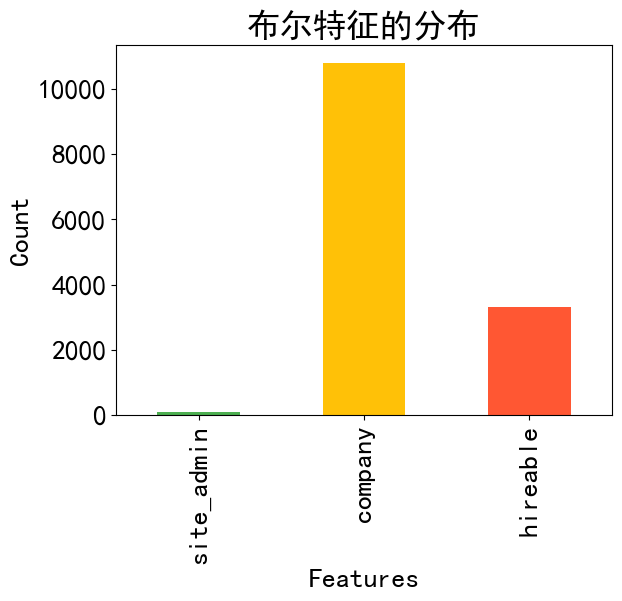

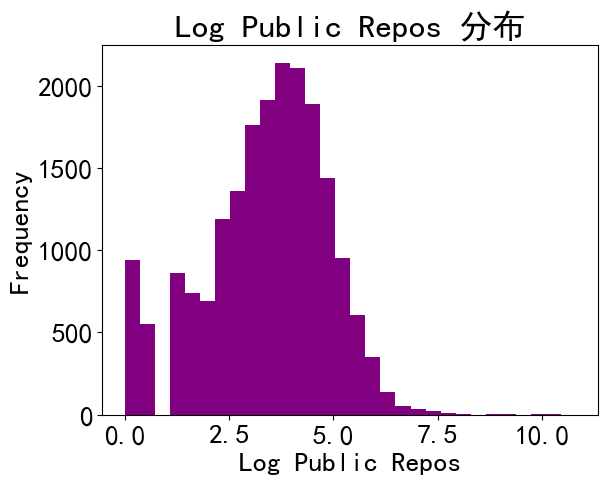

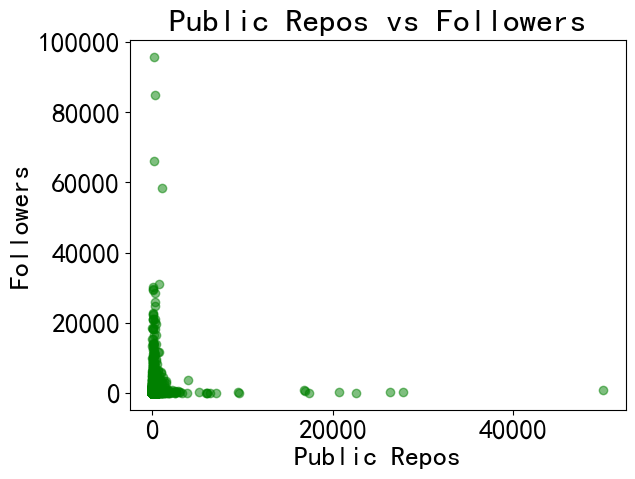

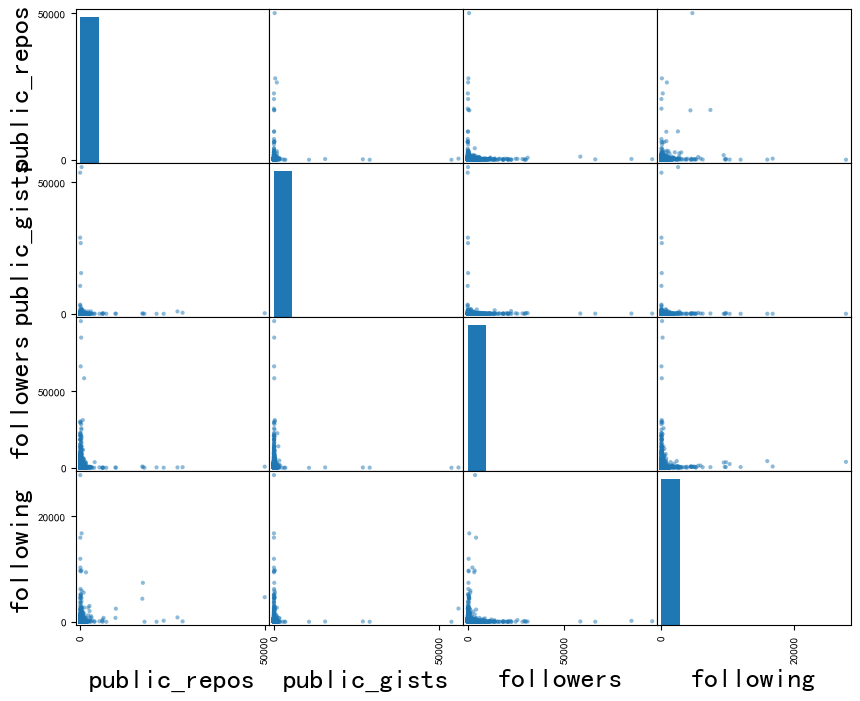

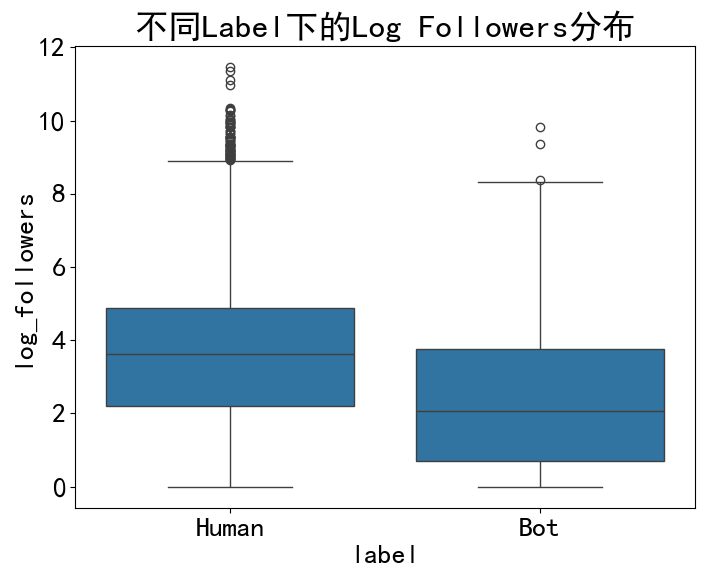

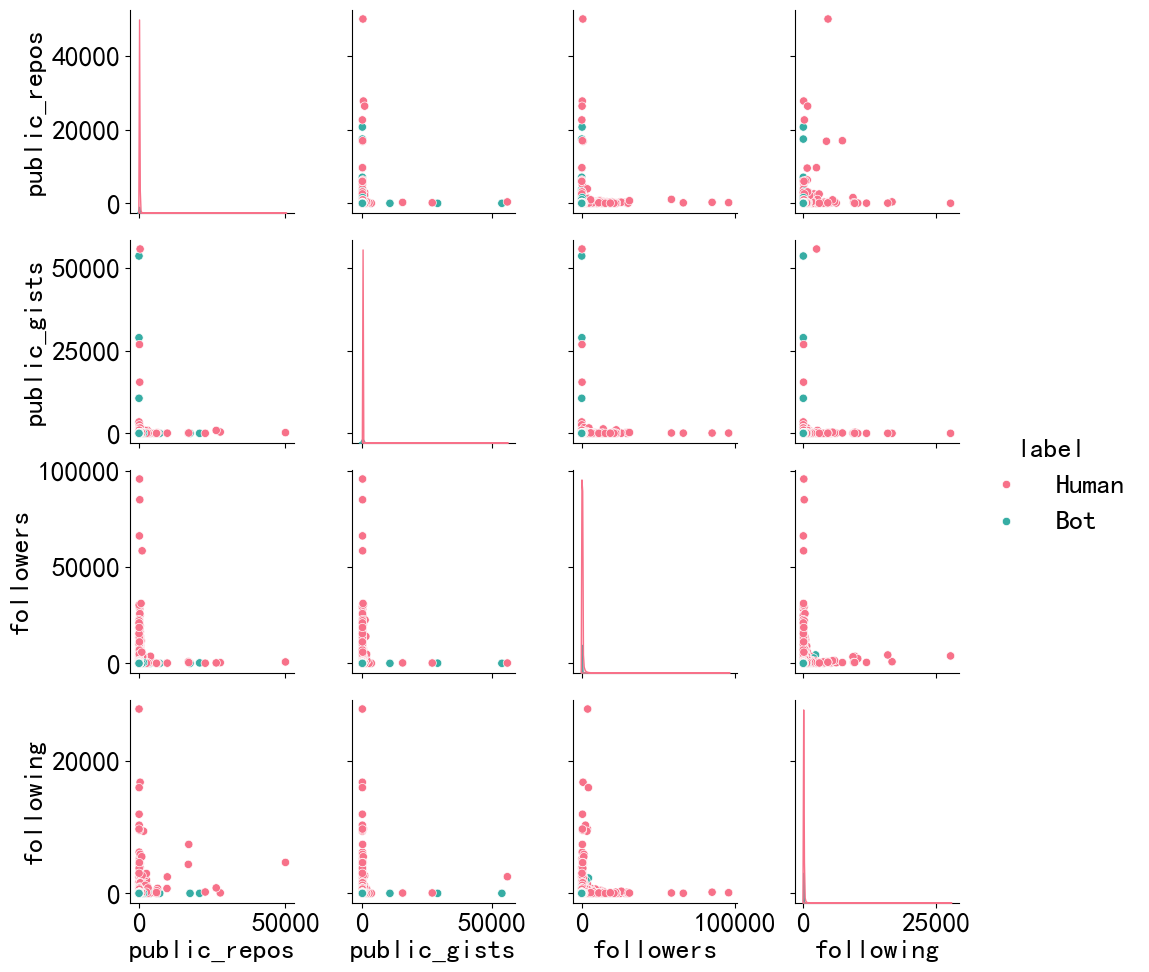

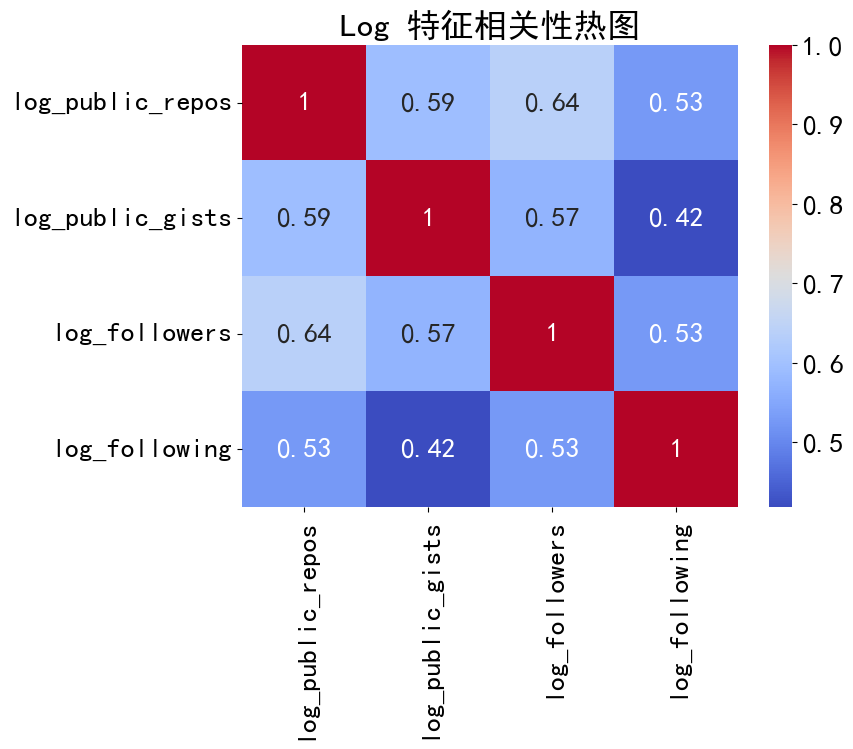

C:\Users\TANG\AppData\Local\Temp\ipykernel_28988\3569505593.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=data, palette='muted')


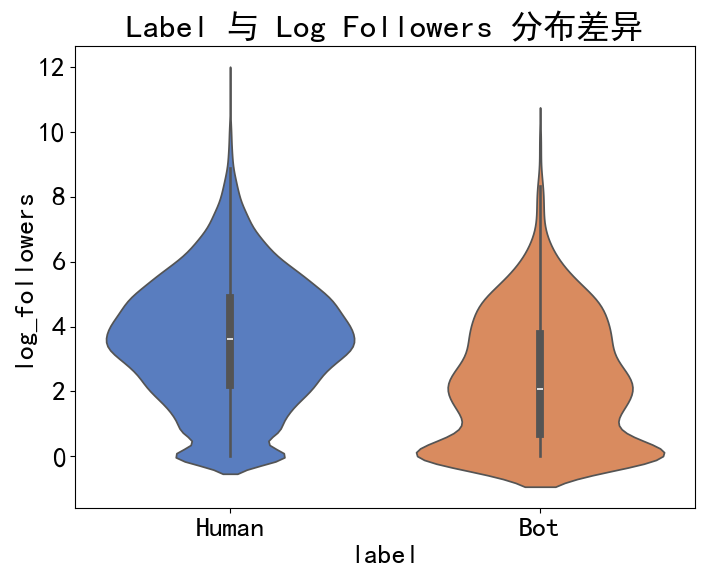

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams.update({'font.size': 20})
# 1. 读取数据集并探索显示选项
file_path = 'github_bot_processed_data.csv'
data = pd.read_csv(file_path)

# 调整显示选项，方便查看更多数据行和列
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# 查看数据的前几行和信息
print("前几行数据：")
print(data.head())

print("\n数据概况：")
print(data.info())

# 生成描述性统计信息
print("\n描述性统计信息：")
print(data.describe())

# 2. 格式化处理数据
# 格式化日期列（created_at和updated_at）
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
print("\n格式化后的created_at和updated_at：")
print(data[['created_at', 'updated_at']].head())

# 格式化其他列为特定格式
data['public_repos_currency'] = data['public_repos'].apply(lambda x: f"${x:,.2f}")
data['followers_percentage'] = data['followers'].apply(lambda x: f"{x:.2%}")
print("\n格式化为货币和百分比的示例：")
print(data[['public_repos_currency', 'followers_percentage']].head())

# 3. 对数变换
for col in ['public_repos', 'public_gists', 'followers', 'following']:
    log_col = f'log_{col}'
    data[log_col] = np.log1p(data[col])  # log1p对0处理友好

print("\n对数变换后的数据：")
print(data[['public_repos', 'log_public_repos', 'followers', 'log_followers']].head())

# 4. 使用Matplotlib绘制图表
plt.figure(figsize=(10, 6))
# 4.1 绘制条形图：展示label的类别分布
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Label 类别分布")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# 4.2 绘制堆积柱状图：展示多个布尔特征的分布
bool_features = ['site_admin', 'company', 'hireable']
data[bool_features].astype(int).sum().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#FF5733'])
plt.title("布尔特征的分布")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()

# 4.3 绘制直方图：展示log_public_repos的分布
plt.hist(data['log_public_repos'], bins=30, color='purple')
plt.title("Log Public Repos 分布")
plt.xlabel("Log Public Repos")
plt.ylabel("Frequency")
plt.show()

# 4.4 绘制散点图：public_repos与followers的关系
plt.scatter(data['public_repos'], data['followers'], alpha=0.5, color='green')
plt.title("Public Repos vs Followers")
plt.xlabel("Public Repos")
plt.ylabel("Followers")
plt.show()

# 4.5 绘制散点矩阵：多个数值型特征之间的关系
numerical_features = ['public_repos', 'public_gists', 'followers', 'following']
pd.plotting.scatter_matrix(data[numerical_features], figsize=(10, 8), alpha=0.5, diagonal='hist')
plt.show()

# 5. 使用Seaborn绘制图表
# 5.1 绘制箱线图：展示不同label下log_followers的分布
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title("不同Label下的Log Followers分布")
plt.show()

# 5.2 绘制成对图：展示不同特征之间的关系，并根据label分类
sns.pairplot(data, vars=numerical_features, hue='label', palette='husl')
plt.show()

# 5.3 绘制热图：展示log变换后特征之间的相关性
plt.figure(figsize=(8, 6))
sns.heatmap(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr(), annot=True, cmap='coolwarm')
plt.title("Log 特征相关性热图")
plt.show()

# 5.4 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=data, palette='muted')
plt.title("Label 与 Log Followers 分布差异")
plt.show()

# 6. 生成Pandas Profiling数据分析报告
profile = ProfileReport(data, title="GitHub Bot Processed Data Report", explorative=True)
profile.to_file("github_bot_data_report.html")
print("交互式数据分析报告已保存为 github_bot_data_report.html")


In [32]:
!pip show numpy



Name: numpy
Version: 2.0.0
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRI